<a href="https://colab.research.google.com/github/Matceo/SyS./blob/main/Serie%26TransformadaDeFourier./S%26S%3AParcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

wo= 1.0
Fo= 1.5707963267948966


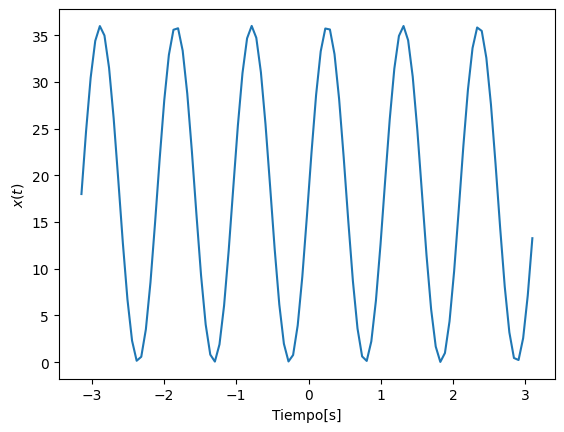

In [32]:
#Ejercicio1

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider

ti=-np.pi #Tiempo inicial
tf=np.pi #Tiempo final
wo=2*np.pi/(tf-ti) #Velocidad angular
Fo=wo/2*np.pi #Frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs=10*Fo #Frecuencia muestreo -> debe respetar Nyquist: Fs>=2Fo
tv=np.arange(ti, tf, 1/Fs) #Vector de tiempo creado con arange que funciona con el tiempo de muestro (Ts=1/Fs)
x=abs(6*np.sin(3*tv+(np.pi/4)))**2 #Señal de entrada
plt.plot(tv, x) #Gráfica de la señal
plt.xlabel('Tiempo[s]')
plt.ylabel('$x(t)$')
plt.show()

In [33]:
#Se crean las bases de la Serie Exponencial Compleja de Fourier:

T=tf-ti #Intervalo de interés
N=20 #Número armonicos a simular
wo=2*np.pi/T #Velocidad angular

#Definimos las bases:

phin=np.zeros((len(tv), 2*N+1), dtype=np.complex_) #Crear arreglo de ceros para guardar bases de números complejos
for n in range(-N, N+1, 1):
    phin[:, n+N]=np.exp(1j*n*wo*tv) #Base Exponencial Compleja de Fourier en el intérvalo de interés.

#Para graficar las bases:

def pltbase(n=1): #Predefine el número de armónicos con el que queremos que inicie nuestra señal.
    plt.plot(tv, np.real(phin[:, int(n+N)]), label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]", fontsize=14)
    plt.ylabel("$\phi_n$(t)", fontsize=14)
    plt.plot(tv, np.imag(phin[:, int(n+N)]), label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase, n=(-N, N, 1))
plt.show()

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

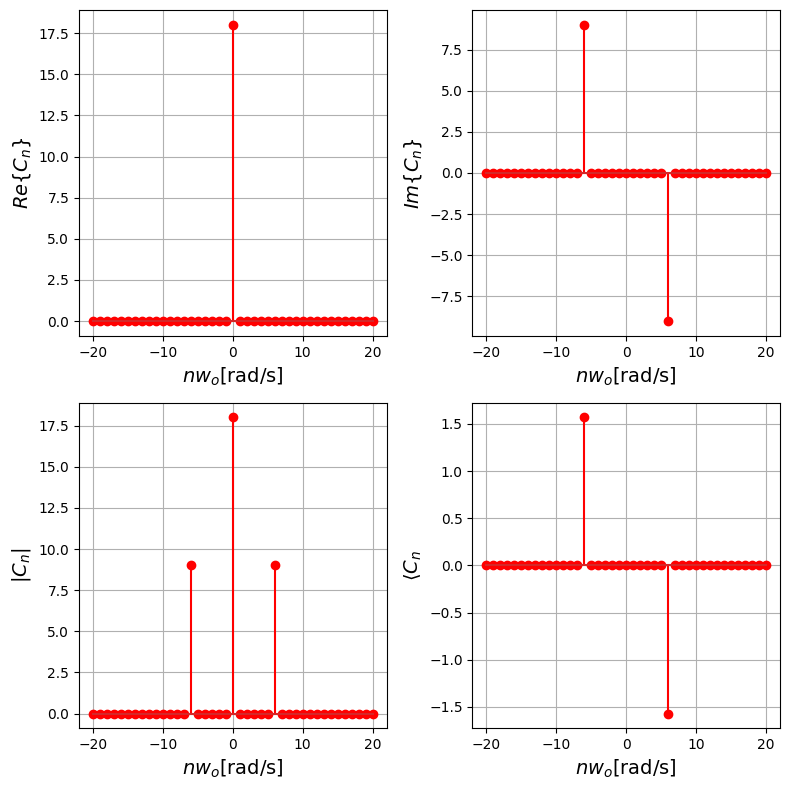

In [34]:
#Calcular el espectro y cambiar según la señal estudiada:

cn=np.zeros(2*N+1, dtype=np.complex_) #Vector fila para los espectros
nv=np.linspace(-N, N, 2*N+1) #Vector de armónicos creado con linspace que funciona con el número de muestras
cn[N]=18 #Nivel DC (valor promedio de la señal) en el tiempo
cn[N-6]=9j #Armónico -6
cn[N+6]=-9j #Armónico 6

#Graficar espectro:

fig=plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(cn), 'r') #Grafica de la parte real del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)
plt.axis('Tight')
plt.grid()
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(cn), 'r') #Grafica de la parte imaginaria del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.axis('Tight')
plt.grid()
plt.subplot(2, 2, 3)
plt.stem(nv, abs(cn), 'r') #Magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.axis('Tight')
plt.grid()
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(cn), 'r') #Fase del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$\langle C_n$', fontsize=14)
plt.axis('Tight')
plt.grid()
fig.tight_layout()
plt.show()

In [35]:
Px=486 #Estimate according to the studied signal
xo=(np.abs(6*np.sin(3*tv+(np.pi/4))))**2 #Señal de entrada original
def pltest(Na=1):
    ind=np.arange(N-Na, N+Na+1)
    er=1-np.sum(np.abs(cn[ind])**2)/Px

#Señal reconstruida:

    xe=np.sum(phin[:, ind]*cn[ind], axis=1) #Suma sobre todos los armónicos

#Ensure lengths are consistent:

    tv_subset=tv[:len(xe)]
    xo_subset=xo[:len(xe)]
    plt.plot(tv_subset, xe, color='b', label='$x_e(t)$', linewidth=5) #Señal estimada o filtrada
    plt.plot(tv_subset, xo_subset, color='r', label='x(t)') #Señal original
    plt.title('$E_R$=%.2f[%%]'%(100*er), fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest, Na=(1, N, 1))

interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

In [36]:
#Ejercicio2

#Simulación con canción de YouTube:

import soundfile as sf #Instalar pip install soundfile
from IPython.display import Audio #Librería para reproducir audio

#Instalar api youtube-dl para poder descargar videos de YouTube:

!pip install youtube-dl

#Descargar canción de interés en formato mp3:

link="https://music.youtube.com/watch?v=H583WMbvSH4"
!youtube-dl --extract-audio -o "audio.%(mp3)s" --audio-format mp3 {link}

[youtube] H583WMbvSH4: Downloading webpage
[download] Destination: audio.NA
[download] 100% of 4.62MiB in 01:16
[ffmpeg] Destination: audio.mp3
Deleting original file audio.NA (pass -k to keep)


In [37]:
#Convertir a .wav y que sea compatible a Python con ffmpeg para extraer audio en Python:

!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [38]:
#Instalar soundfile para cargar .wav:

!pip install soundfile

In [39]:
#Leer archivo .wav:

nombre_out="output.wav"
xa, fs=sf.read(nombre_out)

#Read speech signal from file:

print('Frecuencia de Muestreo %.2f[Hz]\naudio %s'%(fs, nombre_out))

Frecuencia de Muestreo 48000.00[Hz]
audio output.wav


In [40]:
xpro=xa.copy() #Copiar archivos de la canción para procesar cinco segundos de la canción

#Leer cinco segundos de la canción:

ti=20 #Tiempo incio a procesar
tf=25 #Tiempo final a procesar
m=xpro[int(ti*fs):int((tf*fs)), 0] #Señal de mensaje en primer canal del segundo 20 a 25

#Repoducir fragmento original de la señal mensaje:

Audio(m, rate=fs)

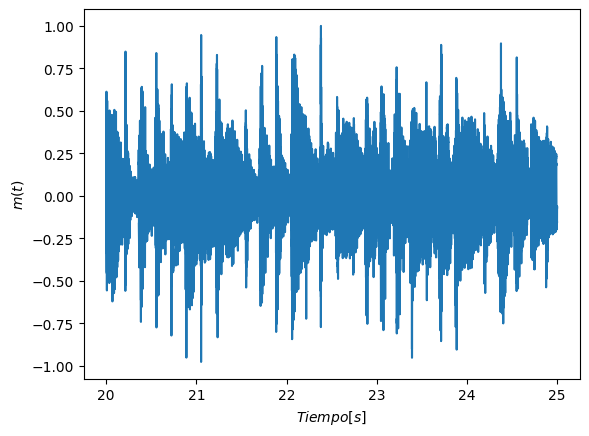

0.999969482421875


In [41]:
import numpy as np
import matplotlib.pyplot as plt

#Señal mensaje en tiempo y frecuencia:

tt=np.arange(ti, tf, 1/fs) #Vector de tiempo creado con arange que funciona con el tiempo de muestreo
plt.plot(tt, m) #Graficar la señal de mensaje en el tiempo
plt.xlabel('$Tiempo[s]$')
plt.ylabel('$m(t)$')
plt.show()
Max=np.max(m)
print(Max)

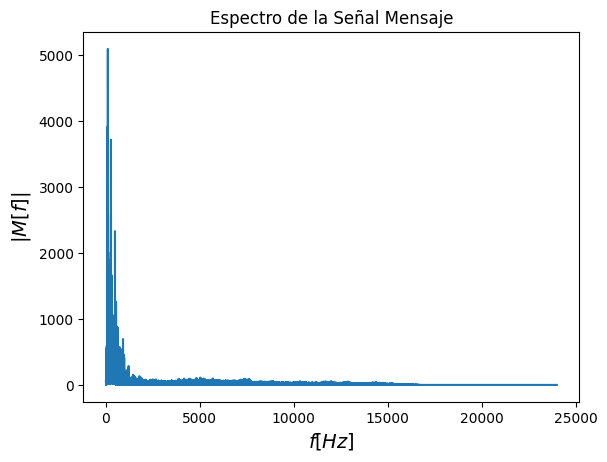

In [42]:
#Fourier a la señal de mensaje:

Mw=np.fft.rfft(m) #Axis=0 permite aplicar FFT por cada columna de xpro
vf=np.fft.rfftfreq(m.shape[0], 1/fs) #Se crea el vector de frecuencias
plt.plot(vf, abs(Mw)) #Se grafica la magnitud
plt.title(r'Espectro de la Señal Mensaje')
plt.xlabel(r'$f[Hz]$', fontsize=14)
plt.ylabel(r'$|M[f]|$', fontsize=14)
plt.show()

In [43]:
Fc=15000 #Frecuencia de la señal portadora
Im=1 #Índice de Modulación (medida de la variación de amplitud que rodea una señal portadora no modulada)
Ac=max(abs(m))/Im #Amplitud de la portadora según el Índice de Modulación
c=Ac*np.cos(2*np.pi*Fc*tt) #Señal portadora.

#Repoducir la señal portadora:

Audio(c, rate=fs)

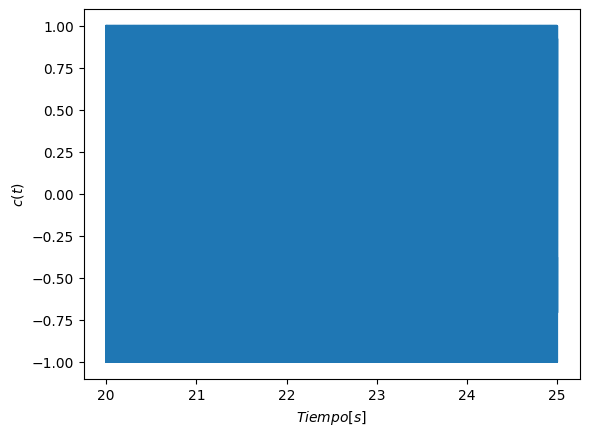

In [44]:
#Señal portadora en tiempo y frecuencia:

plt.plot(tt, c) #Graficar la señal de mensaje en el tiempo
plt.xlabel('$Tiempo[s]$')
plt.ylabel('$c(t)$')
plt.show()

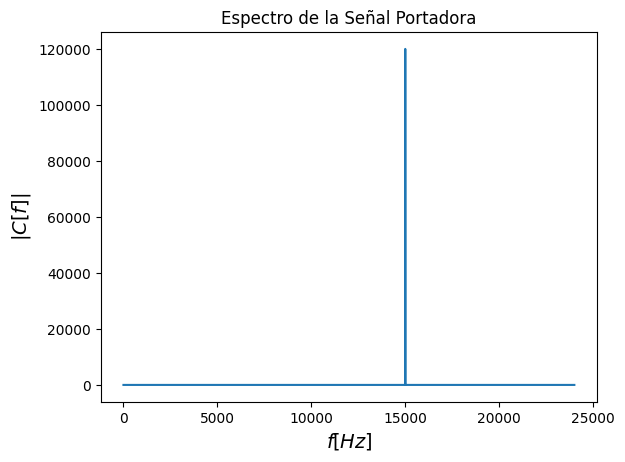

In [45]:
#Fourier a la señal portadora:

Cw=np.fft.rfft(c) #Axis=0 permite aplicar FFT por cada columna de xpro
plt.plot(vf, abs(Cw)) #Se grafica la magnitud
plt.title(r'Espectro de la Señal Portadora')
plt.xlabel(r'$f[Hz]$', fontsize=14)
plt.ylabel(r'$|C[f]|$', fontsize=14)
plt.show()

In [46]:
#Señal modulada:

y=(1+m/Ac)*c #Señal modulada en AM

#Repoducir la señal modulada:

Audio(y, rate=fs)

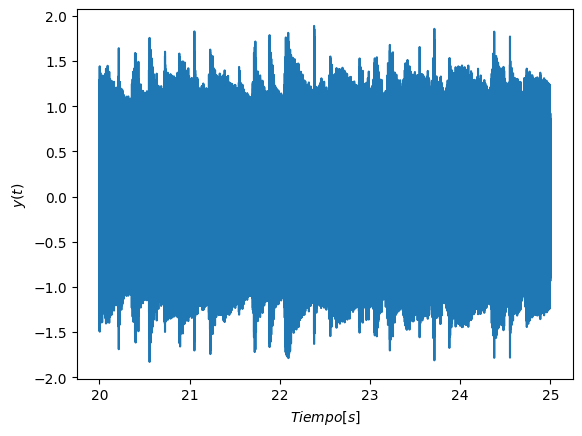

In [47]:
plt.plot(tt, y) #Graficar la señal de mensaje en el tiempo
plt.xlabel('$Tiempo[s]$')
plt.ylabel('$y(t)$')
plt.show()

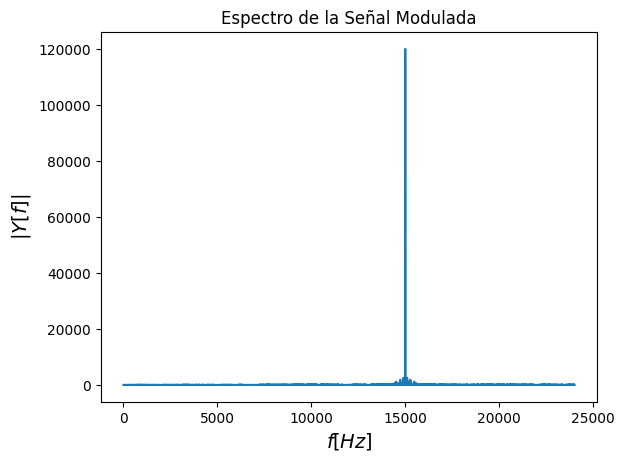

In [48]:
#Fourier a la señal modulada:

Yw=np.fft.rfft(y) #Axis=0 permite aplicar FFT por cada columna de xpro
plt.plot(vf, abs(Yw)) #Se grafica la magnitud
plt.title(r'Espectro de la Señal Modulada')
plt.xlabel(r'$f[Hz]$', fontsize=14)
plt.ylabel(r'$|Y[f]|$', fontsize=14)
plt.show()

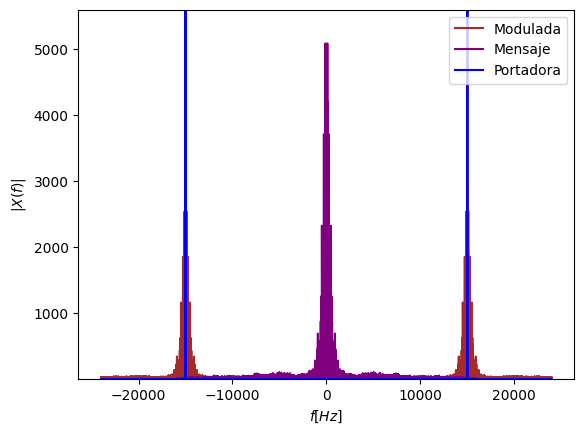

In [49]:
#Cálculo de espectros:

Xfc=np.fft.fft(c) #Transformada Rápida de Fourier de la señal portadora
Xfm=np.fft.fft(m) #Transformada Rápida de Fourier de la señal mensaje
Xfy=np.fft.fft(y) #Transformada Rápida de Fourier de la señal modulada
vfre=np.fft.fftfreq(len(c), 1/fs) #Vector de frecuencias
plt.plot(vfre, abs(Xfy), label='Modulada', color='brown')
plt.plot(vfre, abs(Xfm), label='Mensaje', color='purple')
plt.plot(vfre, abs(Xfc), label='Portadora', color='blue')
plt.legend()
plt.xlabel('$f[Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [50]:
#Ejercicio3

import scipy.io as sio #Muestra las clases disponibles en el diccionario
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore') #Ignora todas las advertencias

#Data downloaded for Google Drive:

FILEID="1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-11-21 16:58:13--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 64.233.189.101, 64.233.189.138, 64.233.189.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ks7b3nu8efj03mqmr1vss3kbdais49vr/1700585850000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=76751749-1419-4a50-932c-be9e9b89b129 [following]
--2023-11-21 16:58:14--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ks7b3nu8efj03mqmr1vss3kbdais49vr/1700585850000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=76751749-1419-4a50-932c-be9e9b89b129
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 64.233.189.132, 

In [51]:
#Cargar los datos desde el archivo .mat:

path_='CaractCE.mat' #Se le crea una ruta de archivo
dicX=sio.loadmat(path_) #Se cargan los datos del archivo en formato MatLab a un diccionario

In [52]:
Xt=dicX['F'] #Se crea una matriz con los elementos guardados con la clave F dentro del diccionario que contiene los datos de las señales en el tiempo
Fs=12000 #Frecuencia de muestreo
Tl=Xt.shape[1]/Fs #Se obtiene el tamaño o tiempo de muestreo de los segmento dividiendo el número de muestras entre la frecuencia de muestreo
print('Xt shape:', Xt.shape)
print('Tiempo[s]', Tl)
Y=dicX['E'] #Se crea una matriz con los elementos guardados con la clave E dentro del diccionario que contiene las clases de fallos en los rodamientos
Ytrue=Y[:, 2] #Clases de fallos en los rodamientos
labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #Lista con los nombres de las clases de fallos en los rodamientos

Xt shape: (1200, 4000)
Tiempo[s] 0.3333333333333333


In [53]:
print(Ytrue.shape) #Etique membresia de los datos, diez posibles valores
print(np.unique(Ytrue)) #Identifica y extrae los valores únicos de Ytrue

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [54]:
#Partir datos para train y test:

Xtrain, Xtest, Ytrain, Ytest=train_test_split(Xt, Ytrue, test_size=0.3) #Divide los vectores y matrices dentro de subconjuntos aleatorios de entrenamiento y prueba

'''Xtrain es un subconjunto de datos aleatorios de entrenamiento de Xt.
Ytrain es un subconjunto de datos aleatorios de entrenamiento de Ytrue.
Ytest es un subconjunto de datos aleatorios de prueba de Ytrue.'''

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape}, Xtest shape {Xtest.shape}")

Xtrain shape (840, 4000), Ytrain shape (840,), Xtest shape (360, 4000)


In [55]:
#Calcular el espectro de Fourier a Xtrain:

vf=np.fft.rfftfreq(Xtrain.shape[1], 1/Fs) #Vector de Frecuencia
Xw=(abs(np.fft.rfft(Xtrain))) #FFT
Xw.shape

(840, 2001)

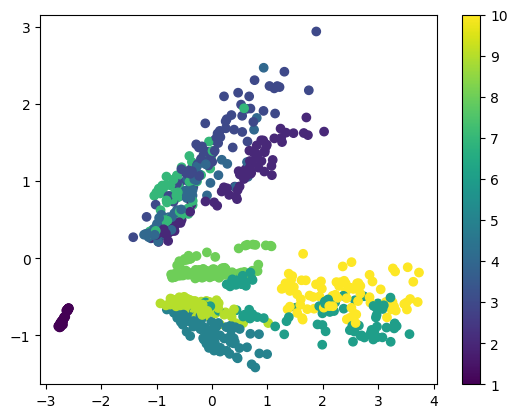

In [56]:
#Graficar espectro para las clases representativas:

sca_=MinMaxScaler() #Escala los datos entre 0 y 1
Xw_=sca_.fit_transform(Xw.T).T
#red=TSNE(perplexity=15, n_components=2, random_state=123, learning_rate='auto', init='pca')
red=PCA(n_components=2) #Se hace una reducción usando un método de reducción dimensional sin perdida de información
Z=red.fit_transform(Xw_) #Transforma y almacena la red
plt.scatter(Z[:, 0],Z[:, 1], c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

In [57]:
np.unique(Ytrain) #Identificar y extraer los valores únicos de las categorías almacenadas en Ytrain

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

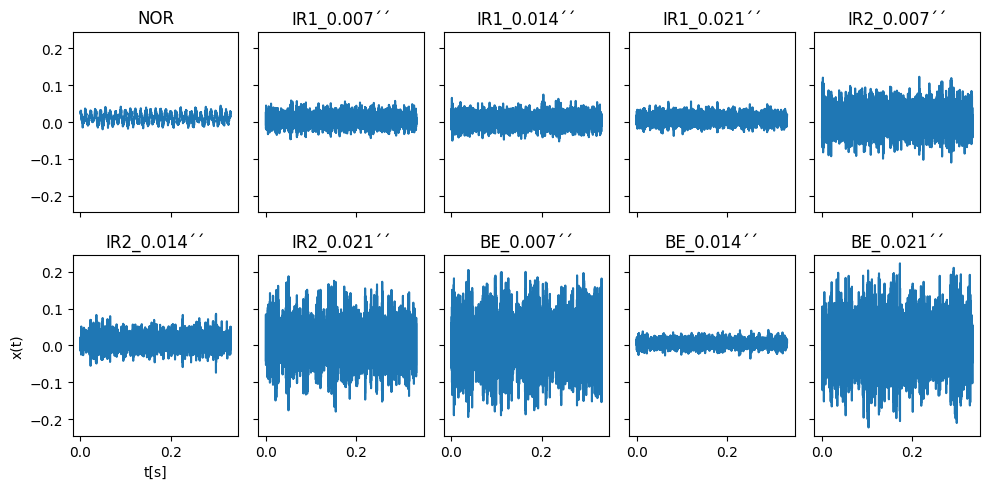

In [58]:
#Graficar señales en el tiempo y la frecuencia desde Xtrain y Ytrain:

nrows=2
ncols=5

#Gráfica en el tiempo de señales promedio por clase:

fig, ax=plt.subplots(nrows=nrows, ncols=ncols,
                       sharex=True, sharey=True, figsize=(10, 5))
tv=np.arange(0, Tl, 1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i, j].plot(tv, Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
     ax[i, j].set_title(labels_[ncols*i+j])
     ax[1, 0].set_xlabel('t[s]')
     ax[1, 0].set_ylabel('x(t)')
plt.tight_layout()
plt.show()

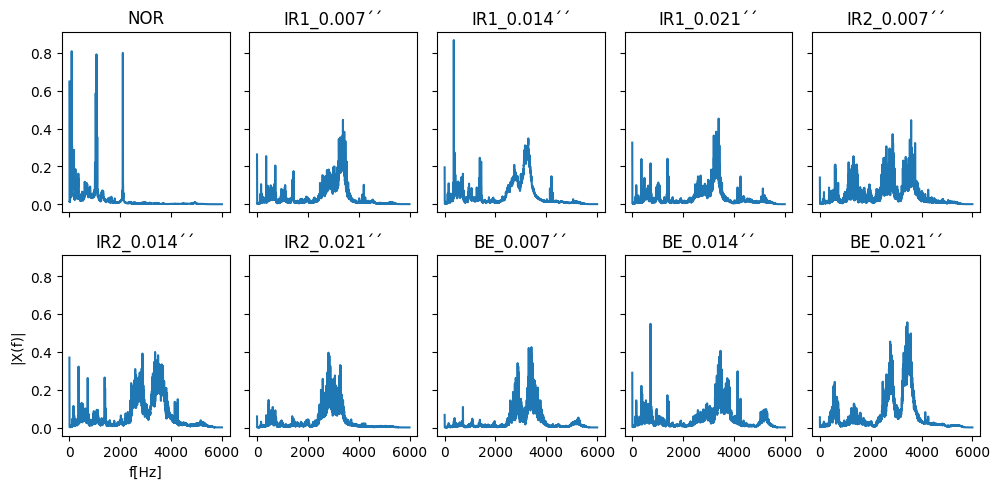

In [59]:
#Gráfica en la frecuencia de las señales promedio por clase:

fig, ax=plt.subplots(nrows=nrows, ncols=ncols,
                       sharex=True, sharey=True, figsize=(10, 5))
tv=np.arange(0, Tl, 1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i, j].plot(vf, abs(Xw_[Ytrain==ncols*i+j+1]).mean(axis=0))
     ax[i, j].set_title(labels_[ncols*i+j])
ax[1, 0].set_xlabel('f[Hz]')
ax[1, 0].set_ylabel('|X(f)|')
plt.tight_layout()
plt.show()

In [60]:
from scipy.spatial.distance import cdist

#FFT a Xtest:

Xwt=(abs(np.fft.rfft(Xtest))) #FFT
Xwt_=sca_.fit_transform(Xwt.T).T #Ajusta los datos y luego los transforma a un rango entre 0 y 1
Dtr_te=cdist(Xw_, Xwt_) #Halla la distancia euclidea entre Xw_ (datos de entrenamiento) y Xwt_ (datos de prueba)
Dtr_te.shape #Distancias de los espectros entre Xtrain y Xtest

(840, 360)

In [61]:
ind_=np.argmin(Dtr_te,axis=0) #Halla la distancia más corta de Dtr_te en cada fila
ind_.shape

(360,)

In [62]:
from sklearn.metrics import accuracy_score

Ytest_e=Ytrain[ind_] #Asigna las predicciones de fallo
print(f"ACC={accuracy_score(Ytest, Ytest_e)}") #Calcula la presición de la predicción de los fallos comparando los datos de prueba con los datos de entrenamiento y entrega un porcentaje

ACC=1.0
